In [17]:
import math
import pandas as pandas
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
df = yf.download('AAPL', start='2012-01-01', end='2025-10-31')
display(df.head())

/tmp/ipython-input-1359579588.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2025-10-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.333216,12.371305,12.266336,12.278333,302220800
2012-01-04,12.399496,12.436686,12.274734,12.296327,260022000
2012-01-05,12.537157,12.552752,12.376405,12.444785,271269600
2012-01-06,12.668215,12.678712,12.572844,12.589339,318292800
2012-01-09,12.648122,12.828668,12.636725,12.761189,394024400


In [12]:
df.shape

(3478, 5)

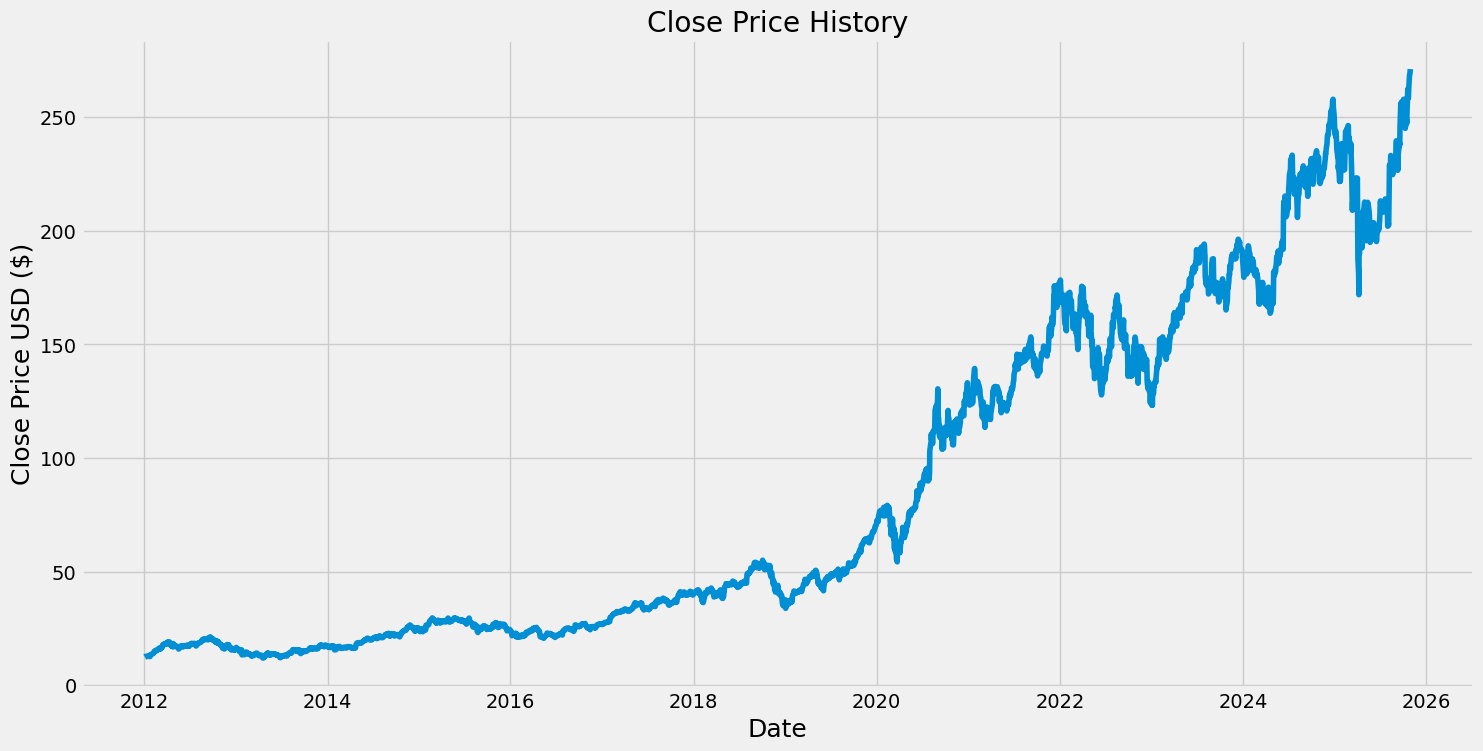

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
data = df[['Close']]
dataset = data.values
#get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2783

In [30]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [35]:
dataset.shape

(3478, 1)

In [36]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 60:
        #print(x_train)
        #print(y_train)
        #print()

In [39]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5446, 60, 1)

In [41]:
from keras.src.models import model
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [59]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 127s 23ms/step - loss: 9.3667e-05
Epoch 2/5
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 127s 23ms/step - loss: 1.0129e-04
Epoch 3/5
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 128s 23ms/step - loss: 8.7487e-05
Epoch 4/5
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 127s 23ms/step - loss: 9.4877e-05
Epoch 5/5
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 128s 23ms/step - loss: 8.1254e-05


In [60]:
#Create the testing data set
#Create a new array  containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [61]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [62]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [63]:
#Get the models predicted prices values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [64]:
#Get the root square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

np.float64(1.0341941119955598)

/tmp/ipython-input-4236848042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


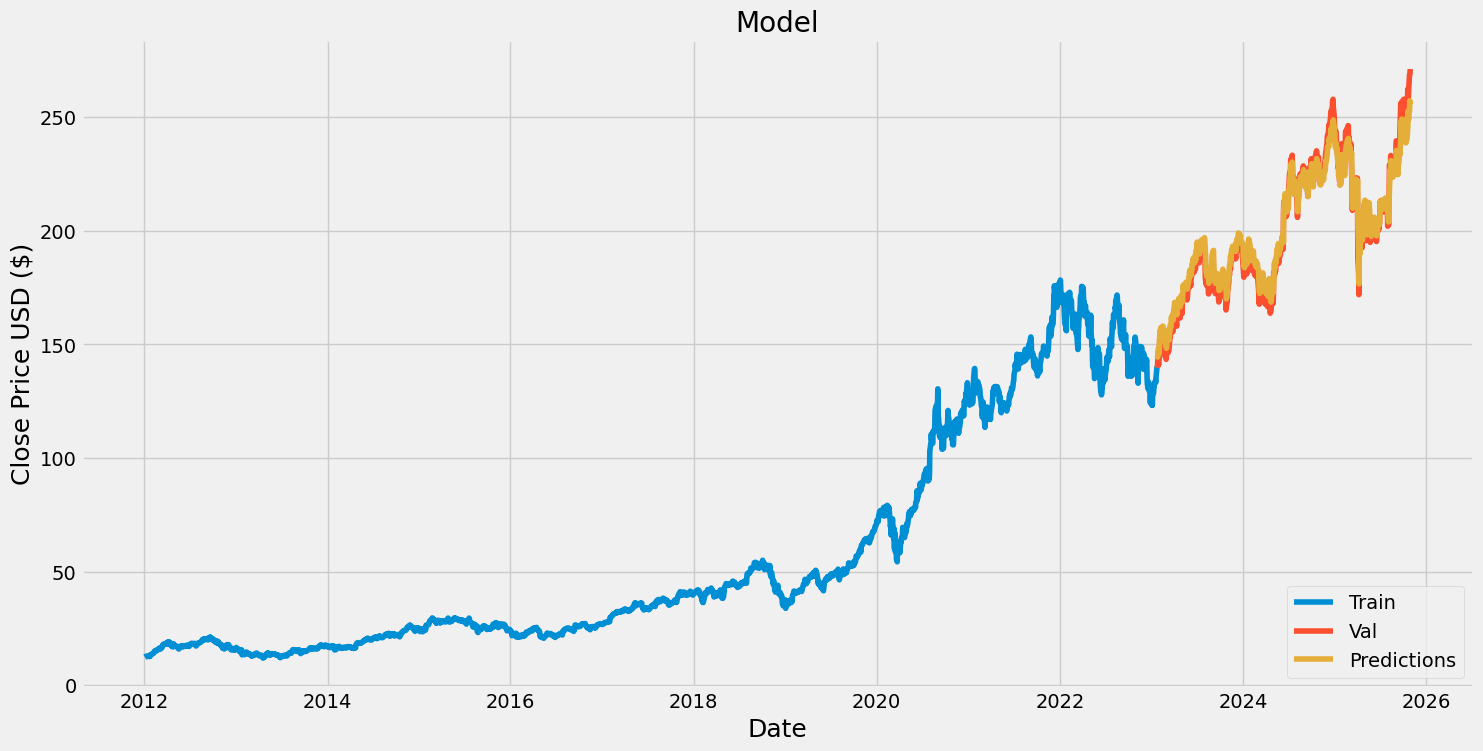

In [65]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
